In [3]:
def download(remoteurl: str, localfile: str):
    """
    Download remoteurl to localfile, unless localfile already exists.
    Returns the localfile string.
    """
    if not os.path.exists(localfile):
        print("Downloading %s..." % localfile)
        filename, headers = urllib.request.urlretrieve(remoteurl, localfile)
    return localfile

def rgba_to_rgb(image):
    """
    Converts image from RGBA format (H,W,4) to RGB format (H,W,3).
    Returns the new RGB image.
    """
    assert image.ndim == 3, "Expected 3-dimensional array"
    assert image.shape[2] == 4, "Expected 4 colour channels"
    assert image.max() <= 1, "Expected color values in range [0,1]"
    rgb, a = np.split(image, [3], axis=2)  # Split into (H,W,3) and (H,W,1)
    return a*rgb + (1-a)                   # Apply alpha blending to get RGB

### Download the different image sheets and metadata from https://github.com/iamcal/emoji-data

In [4]:
download("https://raw.githubusercontent.com/iamcal/emoji-data/master/emoji.json","emoji.json")
download("https://raw.githubusercontent.com/iamcal/emoji-data/master/sheet_apple_16.png","sheet_apple_16.png")
download("https://raw.githubusercontent.com/iamcal/emoji-data/master/sheet_facebook_16.png","sheet_facebook_16.png")
download("https://raw.githubusercontent.com/iamcal/emoji-data/master/sheet_google_16.png","sheet_google_16.png")
download("https://raw.githubusercontent.com/iamcal/emoji-data/master/sheet_twitter_16.png","sheet_twitter_16.png");

### Show an instance of the metadata

In [5]:
data = open('emoji.json')
metadata = json.load(data)
metadata[0]

{'name': 'HASH KEY',
 'unified': '0023-FE0F-20E3',
 'non_qualified': '0023-20E3',
 'docomo': 'E6E0',
 'au': 'EB84',
 'softbank': 'E210',
 'google': 'FE82C',
 'image': '0023-fe0f-20e3.png',
 'sheet_x': 0,
 'sheet_y': 0,
 'short_name': 'hash',
 'short_names': ['hash'],
 'text': None,
 'texts': None,
 'category': 'Symbols',
 'subcategory': 'keycap',
 'sort_order': 1463,
 'added_in': '0.6',
 'has_img_apple': True,
 'has_img_google': True,
 'has_img_twitter': True,
 'has_img_facebook': False}

### Load and inspect the emoji image data

In [6]:
apple = plt.imread("sheet_apple_16.png")
facebook = plt.imread("sheet_facebook_16.png")
google = plt.imread("sheet_google_16.png")
twitter = plt.imread("sheet_twitter_16.png")
sheets = np.concatenate((apple,facebook,google,twitter))

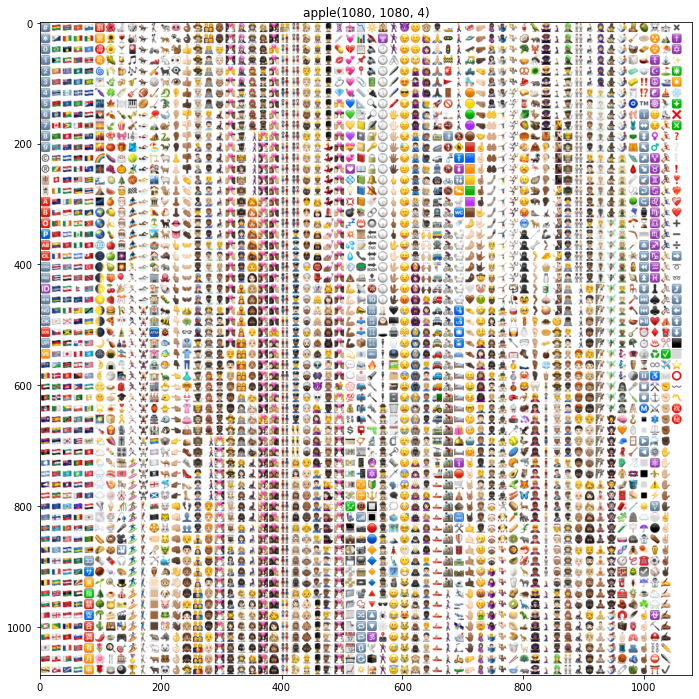

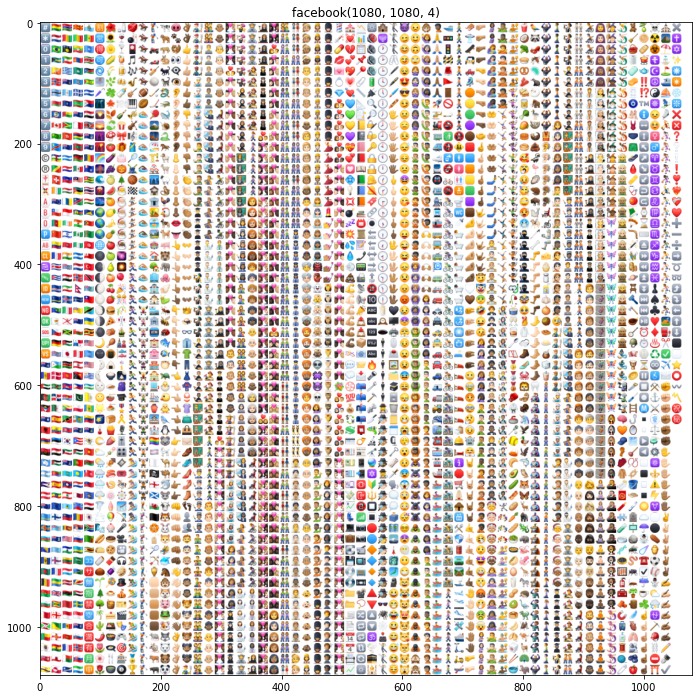

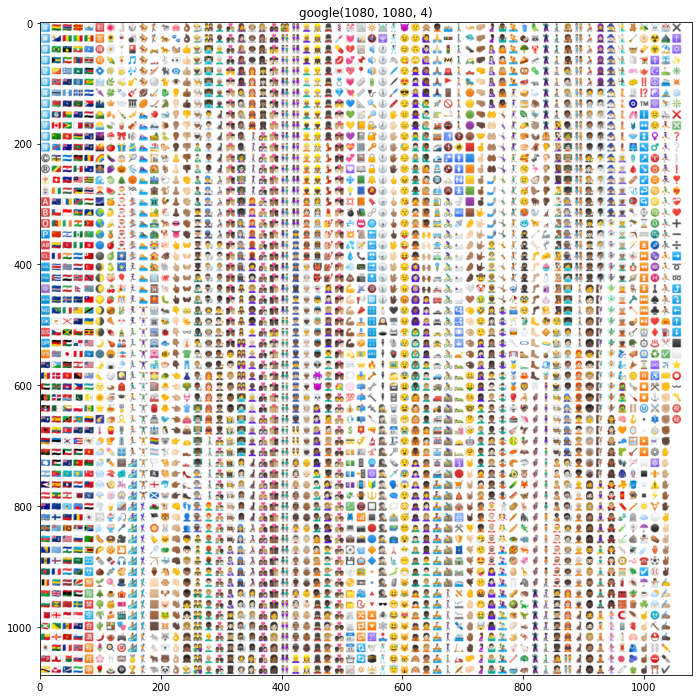

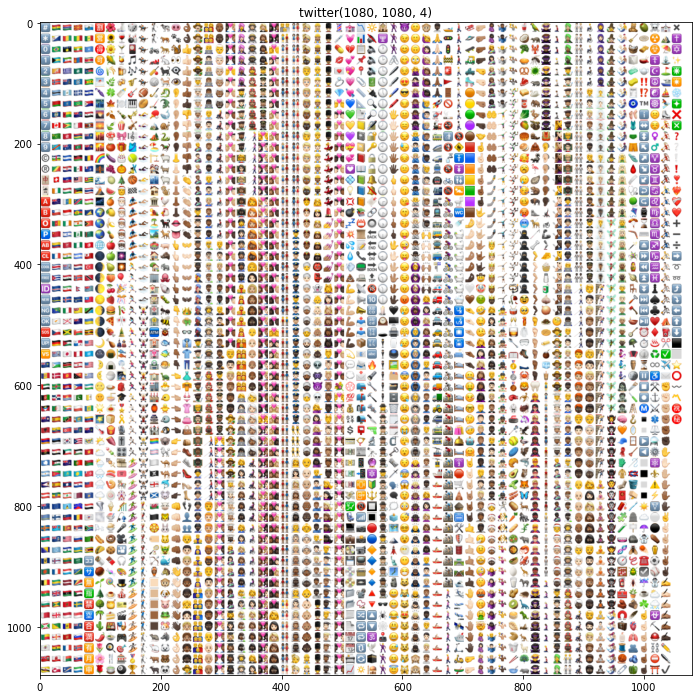

In [7]:
plt.figure(figsize=(12, 12))
plt.imshow(apple)
plt.title("apple" + str(apple.shape));

plt.figure(figsize=(12, 12))
plt.imshow(facebook)
plt.title("facebook" + str(facebook.shape));

plt.figure(figsize=(12, 12))
plt.imshow(google)
plt.title("google" + str(google.shape));

plt.figure(figsize=(12, 12))
plt.imshow(apple)
plt.title("twitter" + str(twitter.shape));

### A closer look at the image data

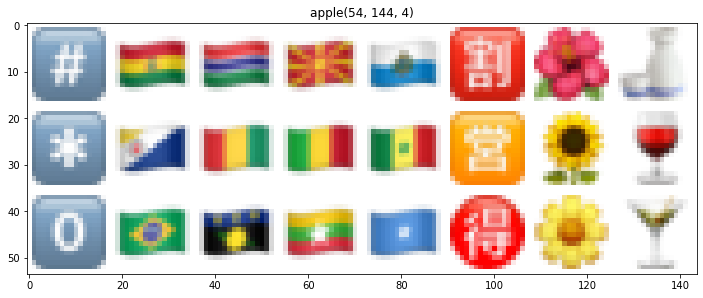

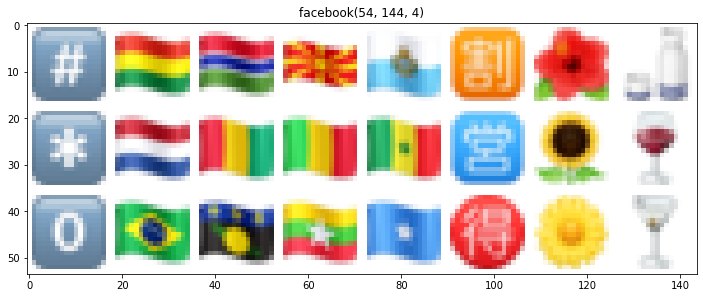

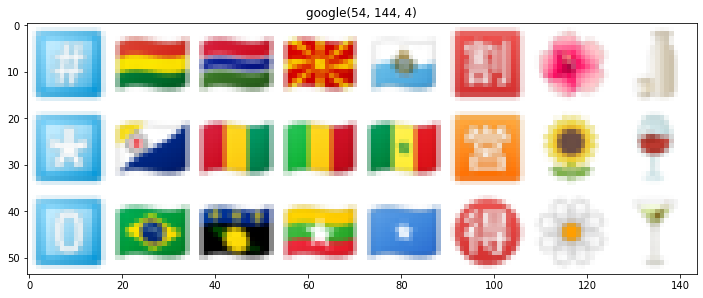

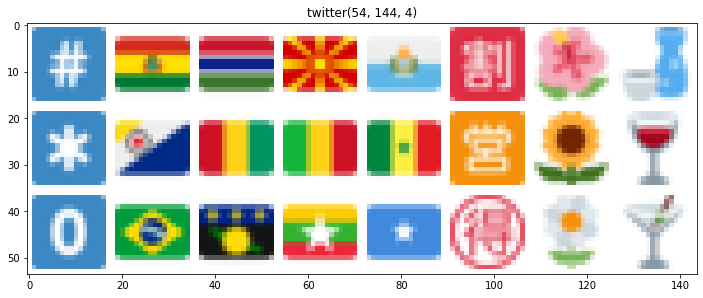

In [8]:
plt.figure(figsize=(12,12))
plt.imshow(apple[:54,:144])
plt.title("apple"+str(apple[:54,:144].shape))

plt.figure(figsize=(12,12))
plt.imshow(facebook[:54,:144])
plt.title("facebook"+str(facebook[:54,:144].shape))

plt.figure(figsize=(12,12))
plt.imshow(google[:54,:144])
plt.title("google"+str(google[:54,:144].shape))

plt.figure(figsize=(12,12))
plt.imshow(twitter[:54,:144])
plt.title("twitter"+str(twitter[:54,:144].shape));

In [9]:
def get_emoji_image(style_index, emoji_index):
    """
    Given a vendor style index (apple=0,facebook=1,google=2,twitter=3)
    and an emoji index, returns the 16x16 RGBA image as a Numpy array
    with shape (16,16,4).
    """
    emoji_x = metadata[emoji_index]['sheet_x']
    emoji_y = metadata[emoji_index]['sheet_y']
    x_location = 18*emoji_x+1
    
    if style_index == 0:
        y_location = 18*emoji_y+1
        
    elif style_index == 1:
        y_location = 18*emoji_y+1080+1
        
    elif style_index == 2:
        y_location = 18*emoji_y+(1080*2)+1
        
    elif style_index == 3:
        y_location = 18*emoji_y+(1080*3)+1

    return sheets[y_location:y_location+16,x_location:x_location+16]

In [10]:
def plot_emoji_styles(emoji_index):
    """Plots all four vendor styles of the given emoji."""
    plt.figure(figsize=(12,3))  
    for i in range(4):
        plt.subplot(1,4,i+1)
        plt.imshow(get_emoji_image(i,emoji_index))
        if i == 0:
            plt.title("apple")
        elif i == 1:
            plt.title("facebook")
        elif i == 2:
            plt.title("google")
        elif i == 3:
            plt.title("twitter")
    plt.suptitle(str(emoji_index)+ " " + metadata[emoji_index]['short_name'])

### Plot a few emojis

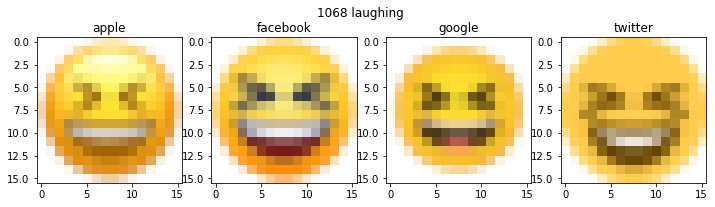

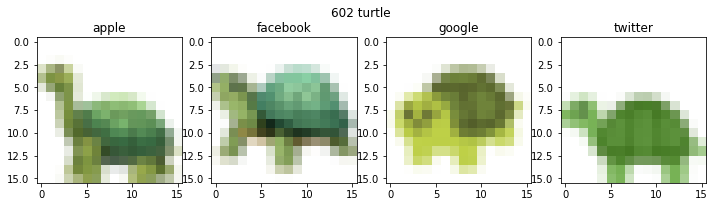

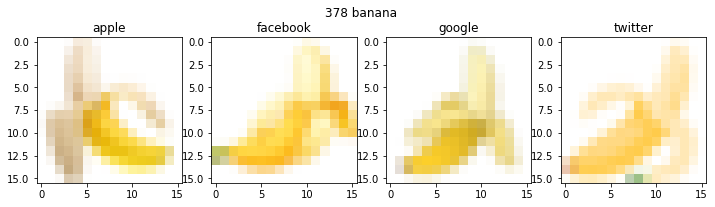

In [11]:
plot_emoji_styles(1068)
plot_emoji_styles(602)
plot_emoji_styles(378)

# Converting the data to a machine learning data set

### Create the inputs - X

In [12]:
apple_inputs = rgba_to_rgb(apple)
fb_inputs = rgba_to_rgb(facebook)
google_inputs = rgba_to_rgb(google)
twit_inputs = rgba_to_rgb(twitter)

em_list = []

for i in range(60):
    for j in range(60):
        emoji_sliced = apple_inputs[j*18:(j+1)*18,i*18:(i+1)*18]
        em_list.append(emoji_sliced)

for i in range(60):
    for j in range(60):
        emoji_sliced = fb_inputs[j*18:(j+1)*18,i*18:(i+1)*18]
        em_list.append(emoji_sliced)

for i in range(60):
    for j in range(60):
        emoji_sliced = google_inputs[j*18:(j+1)*18,i*18:(i+1)*18]
        em_list.append(emoji_sliced)

for i in range(60):
    for j in range(60):
        emoji_sliced = twit_inputs[j*18:(j+1)*18,i*18:(i+1)*18]
        em_list.append(emoji_sliced)

X = np.array(em_list,dtype='float32')
X = X.reshape(14400,972)
X = [X[x] for x in range(14400) if np.sum(X[x]) != 972]
X = np.array(X,dtype='float32')
X = X.reshape(14068,972)

### Check that plotting an emoji works properly

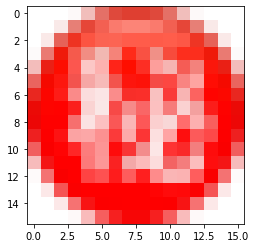

In [13]:
rowOfX = X[3516].reshape(18,18,3)
rowOfX = rowOfX[1:17,1:17]
plt.imshow(rowOfX);

### Extract the different categories of emojis

In [14]:
categories = []
for i in range(len(metadata)):
    if metadata[i]['category'] not in categories:
        categories.append(metadata[i]['category'])

### Create the targets that correspond to the proper inputs - y

In [16]:
outputs = []

for i in range(len(metadata)):
    
    # To account for skin variations 
    if 'skin_variations' in metadata[i]:
        for j in range(len(metadata[i]['skin_variations'])+1):
            outputs.append(categories.index(metadata[i]['category']))
    
    # If no skin variants
    else:
        outputs.append(categories.index(metadata[i]['category']))
    
y = np.array(outputs,dtype='int32')
y = np.tile(y,4)

### Test that the target of an arbitrary emoji (laughing) is correct

In [17]:
# Find index of laughing emoji in X
# Search through array and count how many emojis and variations appear until we get to the short_name of 'laughing'
# This value will give us the first index of laughing in X, and since there are 3517 emojis in each sheet, we just add multiples of 3517 to get the next laughing index
laugh_index = 0
for i in range(len(metadata)):
    if metadata[i]['short_name'] != 'laughing':
        if 'skin_variations' in metadata[i]:
            laugh_index += len(metadata[i]['skin_variations'])+1
        else:
            laugh_index += 1
    else: 
        break
index_laughing = [1978,(1978+3517),(1978+3517*2),(1978+3517*3)]

for index in index_laughing:
    # Print the y label for each training example corresponding to a 'laughing' emoji
    print(y[index])
    
# We can see that we get index 9 for each laughing emoji which corresponds to the category of 'Smileys & Emotion'

9
9
9
9


### Split the data with 60% training, 20% validation, 20% testing

In [18]:
X_trn, X_other, y_trn, y_other = sklearn.model_selection.train_test_split(X, y, train_size=0.6, random_state=0)
X_val, X_tst, y_val, y_tst = sklearn.model_selection.train_test_split(X_other, y_other, train_size=0.5, random_state=0)

### Normalize the features using sklearn StandardScaler

In [19]:
scaler = sklearn.preprocessing.StandardScaler()
X_trn = scaler.fit_transform(X_trn)
X_val = scaler.fit_transform(X_val)
X_tst = scaler.fit_transform(X_tst)

### Show an original feature next to a scaled feature

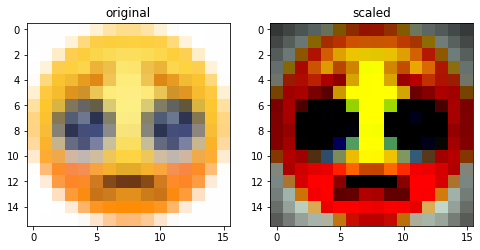

In [20]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
reverted = scaler.inverse_transform(X_trn[87])
rowOfX = reverted.reshape(18,18,3)
rowOfX = rowOfX[1:17,1:17]
rowOfX = np.clip(rowOfX,0,1)
plt.imshow(rowOfX)
plt.title("original")

plt.subplot(1,2,2)
rowOfX = X_trn[87].reshape(18,18,3)
rowOfX = rowOfX[1:17,1:17]
rowOfX = np.clip(rowOfX,0,1)
plt.imshow(rowOfX)
plt.title("scaled");

# Train classifiers and identify good hyperparameters 

In [21]:
def train_estimators(X, y, estimator_type, param_name, param_vals, **kwargs):
    """
    Trains multiple instances of `estimator_type` on (X, y) by setting argument
    named `param_name` to each value in `param_vals`. Prints a message before
    training each instance. Returns the list of trained estimators.
    """
    estimators = []
    args_ls = []
    for arg in kwargs:
        args_str = arg + "=" + str(kwargs[arg])
        args_ls.append(args_str)
        args_str_all = ', '.join(args_ls)

    for val in param_vals:
        clf = estimator_type(**{param_name: val},**kwargs).fit(X,y)
        estimators.append(clf)
        print("Training "+ estimator_type.__name__ +"("+str(param_name)+"="+str(val)+", " + args_str_all+")...")
    
    return estimators

In [22]:
def score_estimators(X, y, estimators):
    """Scores each estimator on (X, y), returning a list of scores."""
    scores = []
    for estimator in estimators:
        score = estimator.score(X,y)
        scores.append(score)
    return scores

In [23]:
def plot_estimator_scores(estimators, param_name, param_vals):
    """
    Plots the training, validation, and testing scores of a list of estimators,
    where `param_name` and `param_vals` are the same as for `train_estimators`.
    The estimator with best validation score will be highlighted with an 'x'.
    """
    training_scores = score_estimators(X_trn,y_trn,estimators)
    validation_scores = score_estimators(X_val,y_val,estimators)
    testing_scores = score_estimators(X_tst,y_tst,estimators)
    
    max_validate_index = 0
    max_validate = 0
    for score in validation_scores:
        if score > max_validate:
            max_validate = score
            max_validate_index = validation_scores.index(score)
    
    plt.plot(np.arange(len(param_vals)),training_scores,'-o',c='g',label='train')
    
    plt.plot(np.arange(len(param_vals)),validation_scores,'-o',c='r',label='validate')
    plt.scatter(max_validate_index,max_validate,c='r',marker='x',s=150)
    
    plt.plot(np.arange(len(param_vals)),testing_scores,'k:',label='test')
    
    plt.ylim(0,1.1)
    plt.xticks(np.arange(len(param_vals)),param_vals)
    
    plt.ylabel('score')
    plt.xlabel(param_name)
    plt.title(estimators[0].__class__.__name__ + " score vs " + param_name)
    plt.legend()
    
    plt.text(3.525,0.35,"train = "+str(round(max(training_scores),3)),c='g') 
    plt.text(3.25,0.25,"validate = "+str(round(max(validation_scores),3)),c='r')
    plt.text(3.55,0.15,"test = "+str(round(max(testing_scores),3)),c='k')

### Train multiple Decision Tree Classifiers

In [24]:
%%time
tree_classifiers = train_estimators(X_trn, y_trn, sklearn.tree.DecisionTreeClassifier,'max_depth', [1, 5, 10, 20, 50, 100], random_state=0, splitter='random')

Training DecisionTreeClassifier(max_depth=1, random_state=0, splitter=random)...
Training DecisionTreeClassifier(max_depth=5, random_state=0, splitter=random)...
Training DecisionTreeClassifier(max_depth=10, random_state=0, splitter=random)...
Training DecisionTreeClassifier(max_depth=20, random_state=0, splitter=random)...
Training DecisionTreeClassifier(max_depth=50, random_state=0, splitter=random)...
Training DecisionTreeClassifier(max_depth=100, random_state=0, splitter=random)...
CPU times: user 2.79 s, sys: 9.35 ms, total: 2.8 s
Wall time: 2.8 s


CPU times: user 92.1 ms, sys: 3.7 ms, total: 95.9 ms
Wall time: 95.2 ms


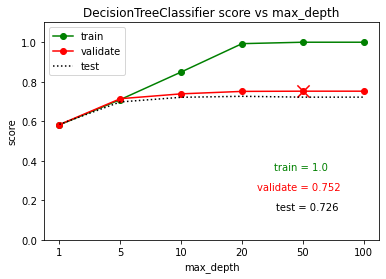

In [25]:
%%time
plot_estimator_scores(tree_classifiers,'max_depth',[1, 5, 10, 20, 50, 100])

### Train multiple Random Forest Classifiers

In [26]:
%%time
forest_classifiers = train_estimators(X_trn, y_trn, sklearn.ensemble.RandomForestClassifier,'max_depth', [1, 5, 10, 20, 50, 100], random_state=0)

Training RandomForestClassifier(max_depth=1, random_state=0)...
Training RandomForestClassifier(max_depth=5, random_state=0)...
Training RandomForestClassifier(max_depth=10, random_state=0)...
Training RandomForestClassifier(max_depth=20, random_state=0)...
Training RandomForestClassifier(max_depth=50, random_state=0)...
Training RandomForestClassifier(max_depth=100, random_state=0)...
CPU times: user 39.1 s, sys: 175 ms, total: 39.3 s
Wall time: 39.5 s


CPU times: user 1.19 s, sys: 12.8 ms, total: 1.21 s
Wall time: 1.2 s


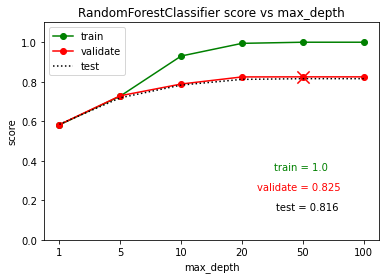

In [27]:
%%time
plot_estimator_scores(forest_classifiers,'max_depth',[1, 5, 10, 20, 50, 100])

### Train multiple Logistic Regression Classifiers

In [28]:
%%time
lr_classifiers = train_estimators(X_trn,y_trn,sklearn.linear_model.LogisticRegression,'C',[1e-05,0.0001,0.001,0.01,0.1,1.0],max_iter=10000,random_state=0)

Training LogisticRegression(C=1e-05, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.0001, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.001, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.01, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.1, max_iter=10000, random_state=0)...
Training LogisticRegression(C=1.0, max_iter=10000, random_state=0)...
CPU times: user 3min 42s, sys: 29.4 s, total: 4min 12s
Wall time: 41.2 s


CPU times: user 679 ms, sys: 161 ms, total: 839 ms
Wall time: 126 ms


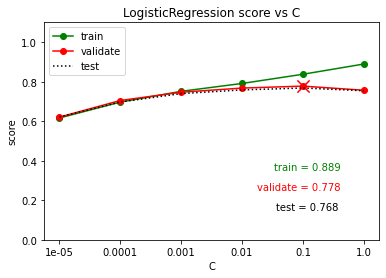

In [29]:
%%time
plot_estimator_scores(lr_classifiers,'C',[1e-05,0.0001,0.001,0.01,0.1,1.0])

### Train multiple SVM Classifiers (SVC)

In [30]:
%%time
svc_classifiers = train_estimators(X_trn,y_trn,sklearn.svm.SVC,'C',[0.01,0.1,1.0,10.0,100.0,1000.0],gamma=0.001,max_iter=10000,random_state=0)

Training SVC(C=0.01, gamma=0.001, max_iter=10000, random_state=0)...
Training SVC(C=0.1, gamma=0.001, max_iter=10000, random_state=0)...
Training SVC(C=1.0, gamma=0.001, max_iter=10000, random_state=0)...
Training SVC(C=10.0, gamma=0.001, max_iter=10000, random_state=0)...
Training SVC(C=100.0, gamma=0.001, max_iter=10000, random_state=0)...
Training SVC(C=1000.0, gamma=0.001, max_iter=10000, random_state=0)...
CPU times: user 1min 41s, sys: 633 ms, total: 1min 42s
Wall time: 1min 42s


CPU times: user 2min 41s, sys: 376 ms, total: 2min 41s
Wall time: 2min 42s


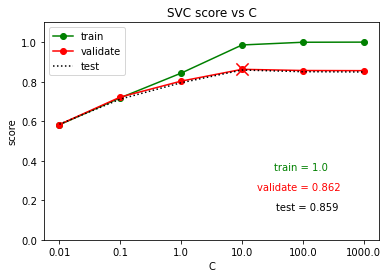

In [31]:
%%time
plot_estimator_scores(svc_classifiers,'C',[0.01,0.1,1.0,10.0,100.0,1000.0])

# Visualizing mistakes

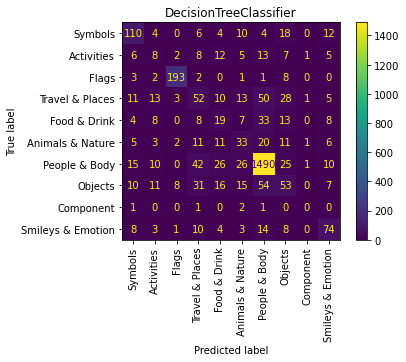

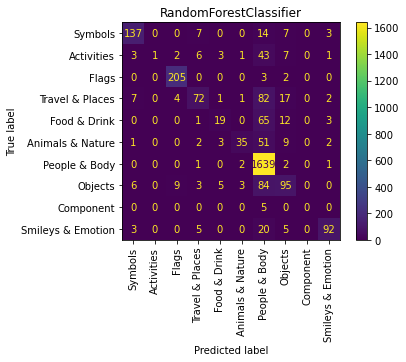

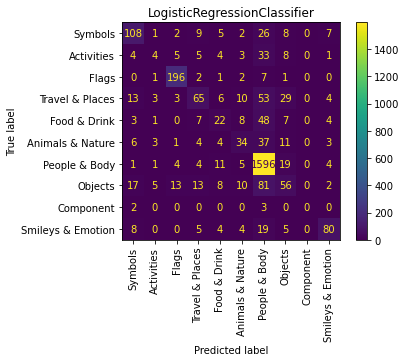

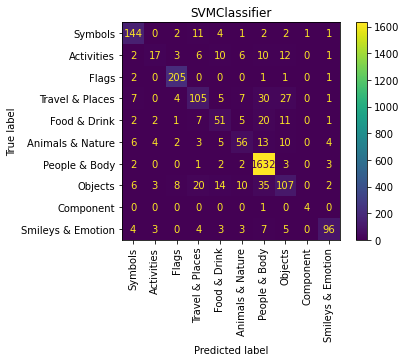

In [32]:
# Plots of the confusion matrices for the best classifier of each type
sklearn.metrics.plot_confusion_matrix(tree_classifiers[4], X_tst, y_tst, display_labels=categories, xticks_rotation='vertical')
plt.title('DecisionTreeClassifier')
sklearn.metrics.plot_confusion_matrix(forest_classifiers[4], X_tst, y_tst, display_labels=categories, xticks_rotation='vertical')
plt.title('RandomForestClassifier')
sklearn.metrics.plot_confusion_matrix(lr_classifiers[4], X_tst, y_tst, display_labels=categories, xticks_rotation='vertical')
plt.title('LogisticRegressionClassifier')
sklearn.metrics.plot_confusion_matrix(svc_classifiers[3], X_tst, y_tst, display_labels=categories, xticks_rotation='vertical')
plt.title('SVMClassifier');

### Visualize specific misclassified examples

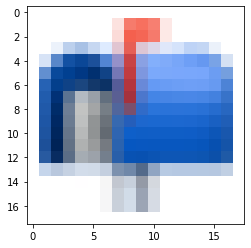

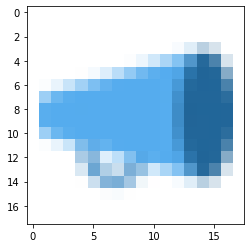

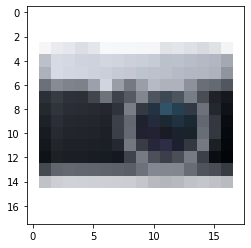

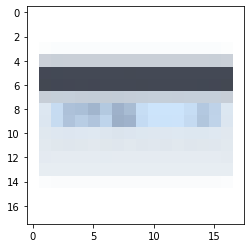

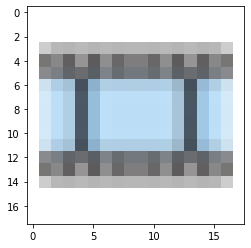

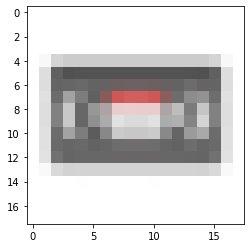

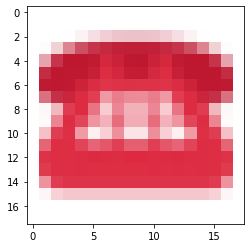

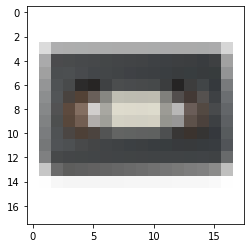

In [33]:
y_pred_svm = svc_classifiers[3].predict(X_tst)
misclassified = np.where(np.logical_and(y_pred_svm==2,y_tst==7))

for val in misclassified[0]:
    plt.figure()
    undo = scaler.inverse_transform(X_tst[val])
    reshape = undo.reshape(18,18,3)
    clipped = np.clip(reshape,0,1)
    plt.imshow(clipped)

# Visualize feature importances

### Visualize sensitivity to specific input features.

In [34]:
def plot_random_forest_importances(estimator):
    """
    Plots the feature importances of the given RandomForestClassifier,
    arranged as three separate 16x16 heatmaps for (red, green, blue).
    """
    assert isinstance(estimator, sklearn.ensemble.RandomForestClassifier)
    importances = estimator.feature_importances_
    importances = importances.reshape(18,18,3)
    importances = importances[1:17,1:17]
    red = importances[:,:,0]
    green = importances[:,:,1]
    blue = importances[:,:,2]
    plt.figure(figsize=(6,8))
    plt.subplot(1,3,1)
    plt.title('R')
    plt.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
    plt.imshow(red,cmap='cool')
    plt.subplot(1,3,2)
    plt.title('G')
    plt.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
    plt.imshow(green,cmap='cool')
    plt.subplot(1,3,3)
    plt.title('B')
    plt.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
    plt.imshow(blue,cmap='cool')

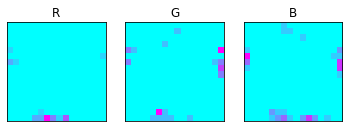

In [35]:
# Plot the feature importances for the forest classifier with max depth of 1
plot_random_forest_importances(forest_classifiers[0])

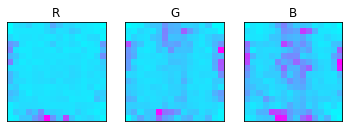

In [36]:
# Plot the feature importances for the best forest classifier
plot_random_forest_importances(forest_classifiers[4])

### Visualize the feature weights of Logistic Regression

In [37]:
def plot_logistic_weights(estimator):
    """
    Plots heatmaps showing the weights of the LogisticRegression estimator,
    with a separate plot for each class and for each colour channel.
    """
    assert isinstance(estimator, sklearn.linear_model.LogisticRegression)
    weights_list = estimator.coef_

    for i in range(len(weights_list)):
        weights_fixed = weights_list[i].reshape(18,18,3)
        weights_fixed = weights_fixed[1:17,1:17]
        
        
        red = weights_fixed[:,:,0]
        green = weights_fixed[:,:,1]
        blue = weights_fixed[:,:,2]
        
        plt.figure(figsize=(12,4))
        plt.suptitle(str(categories[i]))
        
        plt.subplot(1,3,1)
        plt.title('R')
        plt.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
        plt.imshow(red,cmap='bwr')
        
        plt.subplot(1,3,2)
        plt.title('G')
        plt.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
        plt.imshow(green,cmap='bwr')

        plt.subplot(1,3,3)
        plt.title('B')
        plt.tick_params(left=False,labelleft=False,bottom=False,labelbottom=False)
        plt.imshow(blue,cmap='bwr')

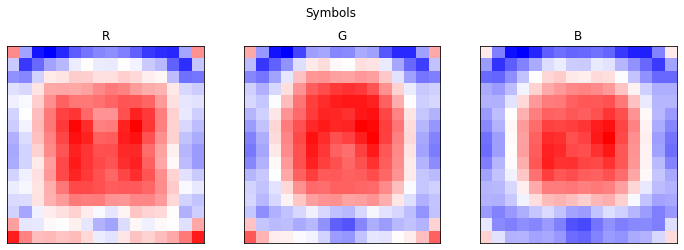

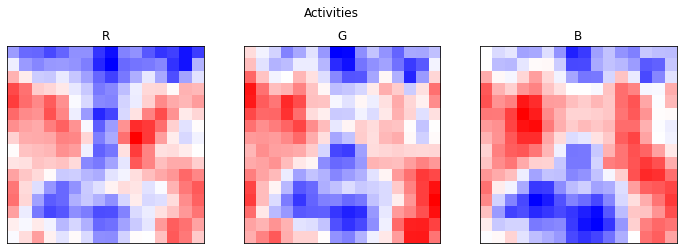

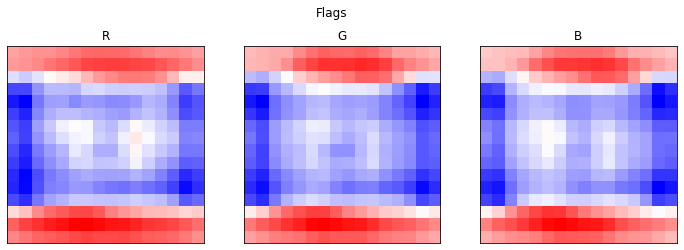

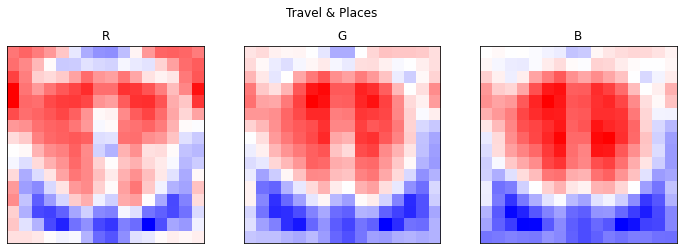

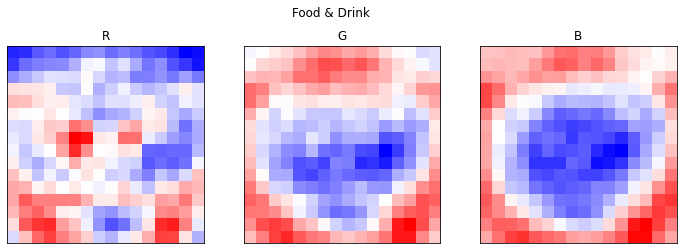

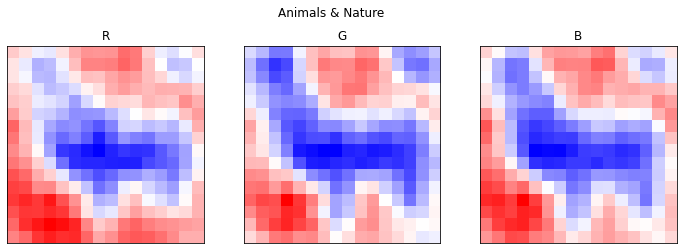

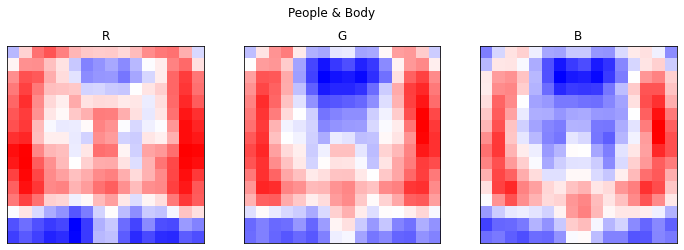

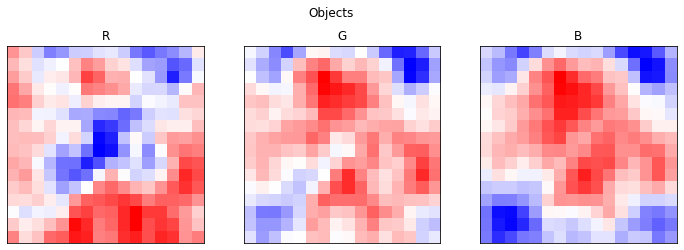

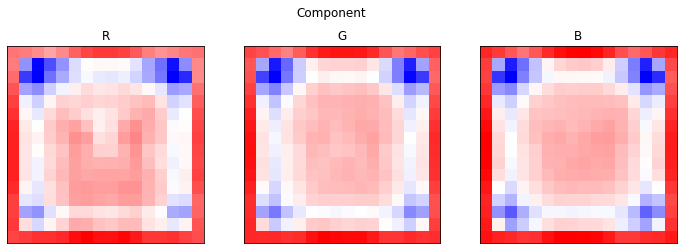

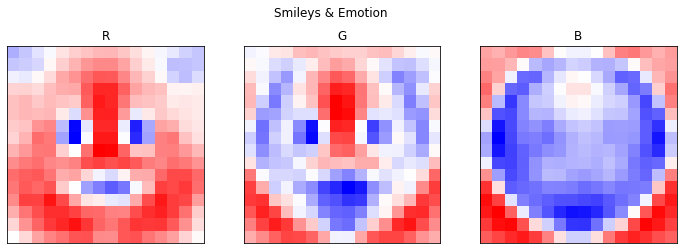

In [38]:
# Plot the weights for the logistic regression classifier with strongest regularization
plot_logistic_weights(lr_classifiers[0])

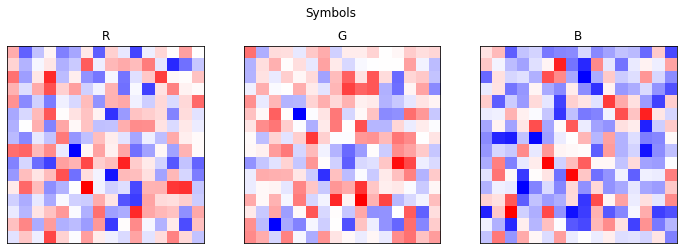

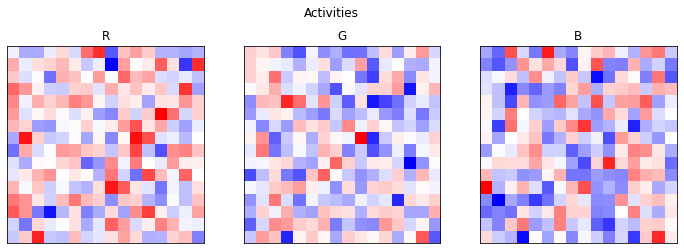

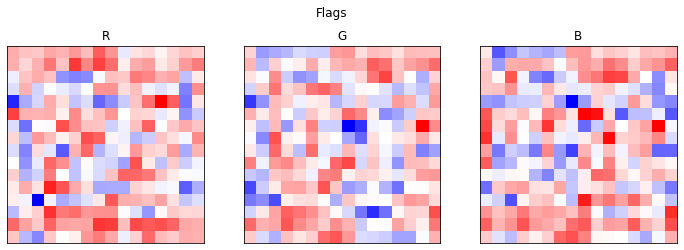

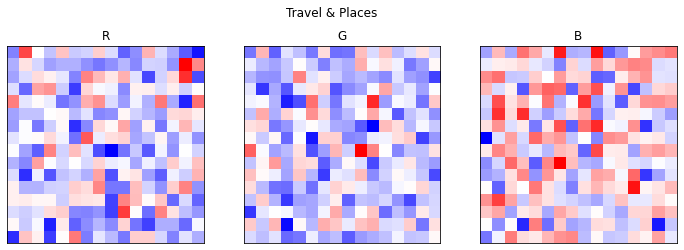

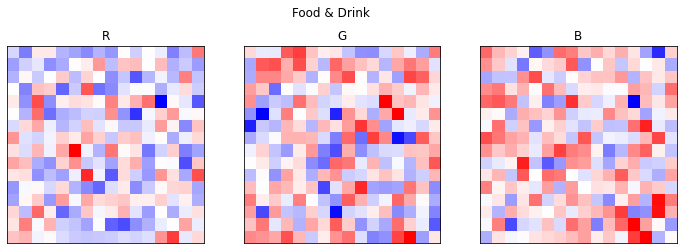

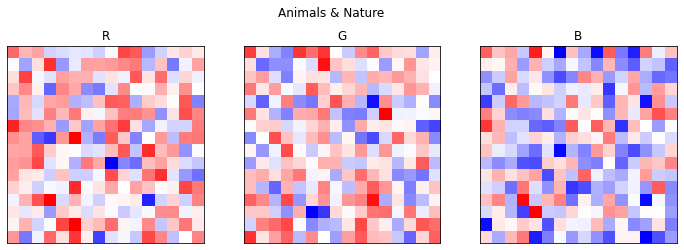

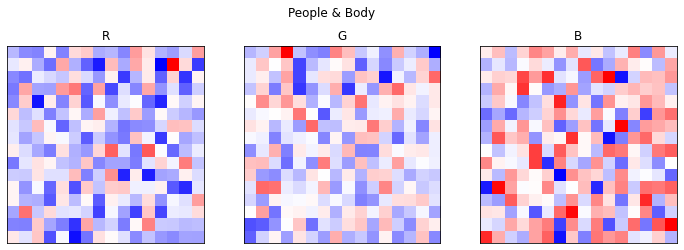

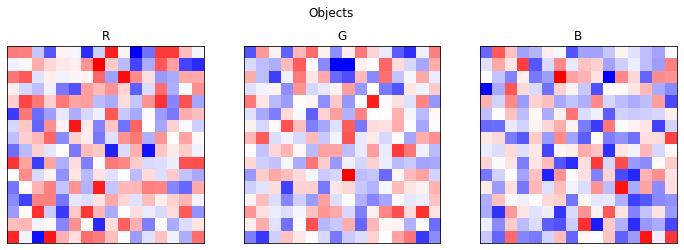

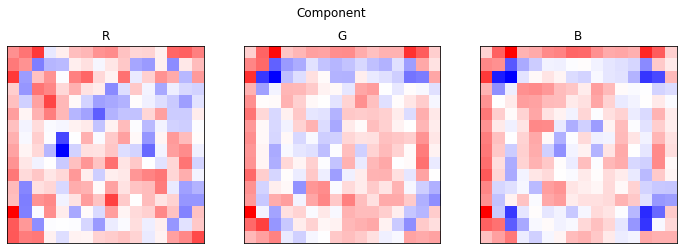

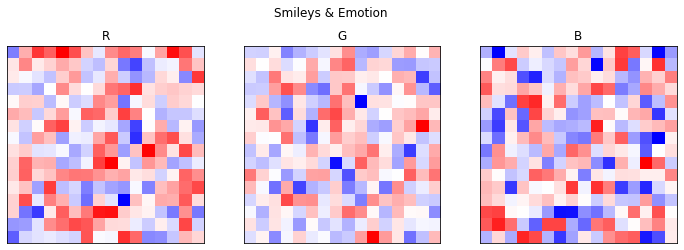

In [39]:
# Plot the weights for the best logistic regression classifier
plot_logistic_weights(lr_classifiers[4])

# Generating Python code for a tree

true: [3 4 6 6]
pred: [3 4 6 6]


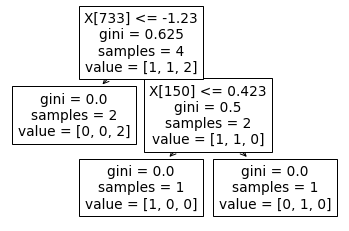

In [40]:
X_tiny = X_trn[:4]
y_tiny = y_trn[:4]
tiny_tree = sklearn.tree.DecisionTreeClassifier(max_depth=2, random_state=0).fit(X_tiny, y_tiny)

sklearn.tree.plot_tree(tiny_tree)
print("true:", y_tiny)
print("pred:", tiny_tree.predict(X_tiny))

In [41]:
def tree_to_code(tree):
    """
    Given a DecisionTreeClassifier, returns a string that
    defines a Python function that corresponds to how the
    decision tree makes predictions.
    """
    assert isinstance(tree, sklearn.tree.DecisionTreeClassifier)

    left = tree.tree_.children_left     
    right = tree.tree_.children_right  
    feature = tree.tree_.feature     
    threshold = tree.tree_.threshold    
    votes = tree.tree_.value        

    output = "def predict(x):"
        
    def visit_subtree(i, depth):
        nonlocal output
        indent = "    "*(depth+1)
                
        if left[i] != right[i]:
            
            output = output + f'\n{indent}if x[{feature[i]}] <= {threshold[i]}:'
            visit_subtree(left[i],  depth+1)
            
            output = output + f'\n{indent}else:'
            visit_subtree(right[i],  depth+1)

        else:
            label = tree.classes_[np.argmax(votes[i])]
            output = output + f'\n{indent}return {label}'

    visit_subtree(0, 0)
    
    return  output

In [42]:
print(tree_to_code(tiny_tree))

def predict(x):
    if x[733] <= -1.2304792404174805:
        return 6
    else:
        if x[150] <= 0.42338547110557556:
            return 3
        else:
            return 4


In [43]:
def compile_func(python_code):
    """
    Compiles a string defining a Python function, and returns
    a reference to the callable function object that results.
    """
    symbols = {}                             
    exec(python_code, None, symbols)         
    assert len(symbols) == 1, "Expected python_code to define a function"
    function = next(iter(symbols.values())) 
    assert callable(function), "Expected python_code to define a function"
    return function

In [44]:
predict = compile_func(tree_to_code(tree_classifiers[4]))
prediction_python = []
prediction_sklearn = tree_classifiers[4].predict(X_trn)
for i in range(len(X_trn)):
    prediction_python.append(predict(X_trn[i]))
    assert(prediction_python[i] == prediction_sklearn[i])

### Compare the prediction speed of your DecisionTreeClassifer instance versus the pure-Python function

In [45]:
%%time
prediction_sklearn = tree_classifiers[4].predict(X_trn)

CPU times: user 4.8 ms, sys: 881 µs, total: 5.68 ms
Wall time: 4.37 ms


In [46]:
%%time
prediction_python = []
for i in range(len(X_trn)):
    prediction_python.append(predict(X_trn[i]))

CPU times: user 200 ms, sys: 803 µs, total: 201 ms
Wall time: 201 ms
